In [74]:
#Lag en modell som predikerer tilsvarende NAND-operatoren.
#Visualiser resultatet etter optimaliseringen av modellen.

In [75]:
import torch as torch
import matplotlib.pyplot as plt
import numpy as np

In [76]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[1.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

In [77]:
class NOToperator:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

        # Predictor
    def f(self, x1, x2):
        return torch.sigmoid((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b)

        # Logits
    def logits(self, x1, x2):
        return ((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b).reshape(-1, 1)

    # Uses Cross Entropy
    def loss(self, x1, x2, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x1, x2), y)

model = NOToperator()

In [78]:
optimizer = torch.optim.SGD([model.b, model.W, model.W], 0.1)
for epoch in range(10000):
    model.loss(x_train[:, 0].reshape(-1, 1),
               x_train[:, 1].reshape(-1, 1),
               y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

C:\Users\Morten\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
C:\Users\Morten\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


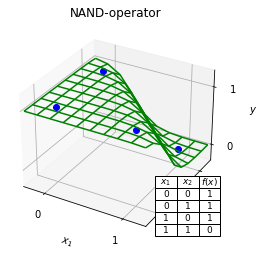

In [79]:
    fig = plt.figure('Oppgave B')
    plot = fig.add_subplot(111, projection='3d')
    plt.title('NAND-operator')

    # Hva gjør denne plottinga? Aner ikke
    x1_grid, x2_grid = np.meshgrid(
        np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10], dtype=np.double)
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            tenseX = torch.tensor(float(x1_grid[i, j])).reshape(-1, 1)
            tenseY = torch.tensor(float(x2_grid[i, j])).reshape(-1, 1)
            y_grid[i, j] = model.f(tenseX, tenseY)
    plot_f = plot.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    plot.plot(x1_train.squeeze(),
              x2_train.squeeze(),
              y_train.squeeze(),
              'o',
              color="blue")

    plot.set_xlabel("$x_1$")
    plot.set_ylabel("$x_2$")
    plot.set_zlabel("$y$")
    plot.set_xticks([0, 1])
    plot.set_yticks([0, 1])
    plot.set_zticks([0, 1])
    plot.set_xlim(-0.25, 1.25)
    plot.set_ylim(-0.25, 1.25)
    plot.set_zlim(-0.25, 1.25)

    table = plt.table(cellText=[[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
                      colWidths=[0.1] * 3,
                      colLabels=["$x_1$", "$x_2$", "$f(x)$"],
                      cellLoc="center",
                      loc="lower right")
    plt.show()

In [81]:
torch.logical_not(torch.logical_and(x_train[:, 0].reshape(-1, 1), x_train[:, 1].reshape(-1, 1)))


tensor([[ True],
        [ True],
        [ True],
        [False]])